### MNIST 텐서플로우 CNN
* 텐서플로 CNN
----
* 컨볼루션 필터 이용 특징 추출
* 맥스 풀링을 통한 최적화
* 드롭아웃을 통한 과적합 방지
---
* 가중치 초기화 함수
* 바이어스 초기화 함수
* 2d 컨볼루션
* 2d 맥스풀링

### MNIST DATA
* 55000 train data
* 10000 test data
* 5000 validation data
* 28*28 =784byte image data

#####  라이브러리 불러오기
* Anaconda prompt 관리자 권한으로 실행
* pip install tensorflow==1.5.0

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### Mnist data example 가져오기

In [191]:
from tensorflow.examples.tutorials.mnist import input_data
mnist= input_data.read_data_sets("c:/MnistData",one_hot=True)

Extracting c:/MnistData\train-images-idx3-ubyte.gz
Extracting c:/MnistData\train-labels-idx1-ubyte.gz
Extracting c:/MnistData\t10k-images-idx3-ubyte.gz
Extracting c:/MnistData\t10k-labels-idx1-ubyte.gz


#### 데이터 성격 확인하기

In [192]:
print('train data sahpe:',mnist.train.images.shape)
print('train label shape',mnist.train.labels.shape)
#print(mnist.train.images[0])
print(mnist.train.labels[0])


train data sahpe: (55000, 784)
train label shape (55000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


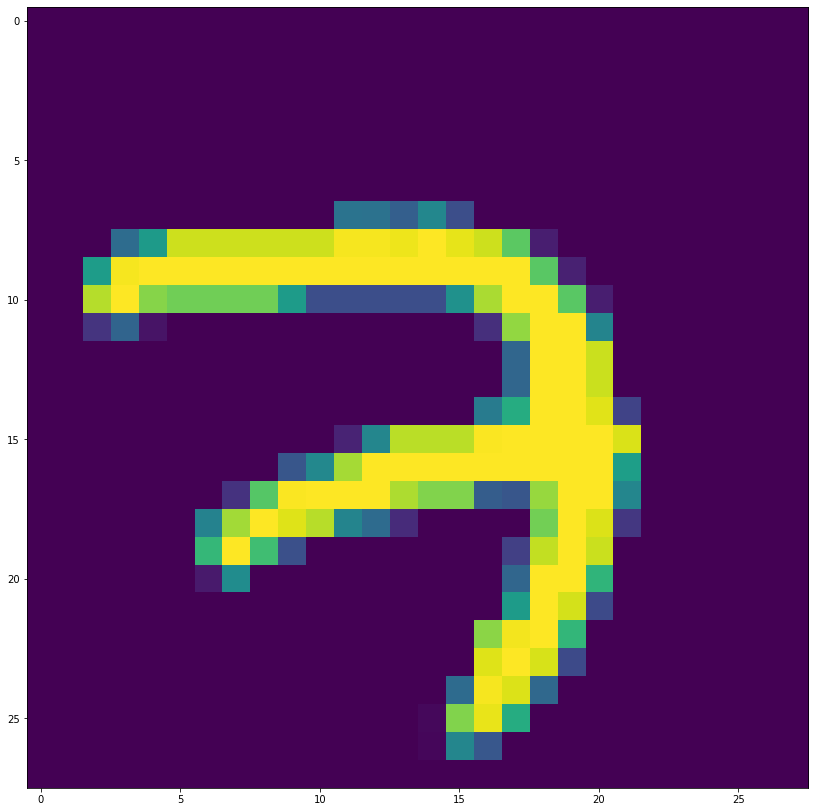

In [193]:
data1=mnist.train.images[0]
imagedata1=data1.reshape([28,28])
plt.imshow(imagedata1)

#### 텐서플로우를 활용한 학습
* 데이터 설정(placeholder)
     - images 데이터 입력부: xdata
     - labels 데이터 입력부: ydata    

In [194]:
x=tf.placeholder(tf.float32,[None,784])
y_=tf.placeholder(tf.float32,[None,10])


#### 함수 설정
* 가중치 초기화 함수

In [195]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

* 바이어스 초기화 함수

In [196]:
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

* 2d 컨볼루션
    -padding : 컨볼루션 결과물이 입력값과 같도록 할것인지 여부
    -strides : 회당 이동 크기

In [197]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

* 2d 맥스풀링

In [198]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

#### 컨볼루션 레이어1 
* 컨볼루션 필터 초기화(가중치)
* 바이어스 초기화


In [199]:
W_conv1 = weight_variable([7, 7, 1, 32])
b_conv1 = bias_variable([32])

In [200]:
x_image = tf.reshape(x, [-1,28,28,1])

#### 컨볼루션처리
* x_image 와 랜덤초기화된 W_con1 을 이용한 컨볼루션 처리한것을
* Relu를 적용
* 맥스 풀링을 통해 데이터 최적화

In [202]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

#### 컨볼루션 레이어2 만들기
* 컨볼루션 필터 초기화(가중치)
* 바이어스 초기화

In [203]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#### 완전연결 계층


In [204]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#### 드롭아웃
* 과적합 방지
* 특징만으로 인식을 시키는 경우 과적합 위험도 상승

In [205]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#### 최종 소프트맥스 레이어 설정


In [206]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

#### 손실지정
* 크로스 엔트로피 사용 픽셀이 가지는 정보량 평균
* 크로스 엔트로피를 최소화 하는 가중치 학습
* 크로스 엔트로피 에러는 loss cost error 등으로 표시


In [211]:
lr=0.01
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### 세션 정의 및 실행

In [ ]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

#### 분석하기
* 학습률 분석
* 가중치 분석


In [212]:
for i in range(2000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.16
step 100, training accuracy 0.82
step 200, training accuracy 0.88
step 300, training accuracy 0.92
step 400, training accuracy 0.94
step 500, training accuracy 0.86
step 600, training accuracy 0.94
step 700, training accuracy 0.96
step 800, training accuracy 0.98
step 900, training accuracy 0.96
step 1000, training accuracy 0.98
step 1100, training accuracy 0.98
step 1200, training accuracy 0.96
step 1300, training accuracy 0.92
step 1400, training accuracy 0.98
step 1500, training accuracy 0.94
step 1600, training accuracy 1
step 1700, training accuracy 0.98
step 1800, training accuracy 0.96
step 1900, training accuracy 0.98
step 2000, training accuracy 0.98
step 2100, training accuracy 0.96
step 2200, training accuracy 1
step 2300, training accuracy 0.92
step 2400, training accuracy 1
step 2500, training accuracy 0.98
step 2600, training accuracy 1
step 2700, training accuracy 0.98
step 2800, training accuracy 1
step 2900, training accuracy 0.98
step 30

KeyboardInterrupt: 